# Planejamento de Sistemas Elétricos

## Trabalho sobre Séries Sintéticas

Laura Mauad Gaio

18/08/2023

## Instalação

In [1]:
!pip install PySDDP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=efaa6ea414b3828945cbf786580c1df77767ab80dd16138b2a948e82326395fa
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26307 sha256=492b44f9b20233dcafd5c39927a2e2d92fd32679e261ed64edd6dbbfa64ce9d7
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built pyswarm typing


### Download do Conjunto de Arquivos para Cálculo do NEWAVE

https://www.ccee.org.br/web/guest/acervo-ccee

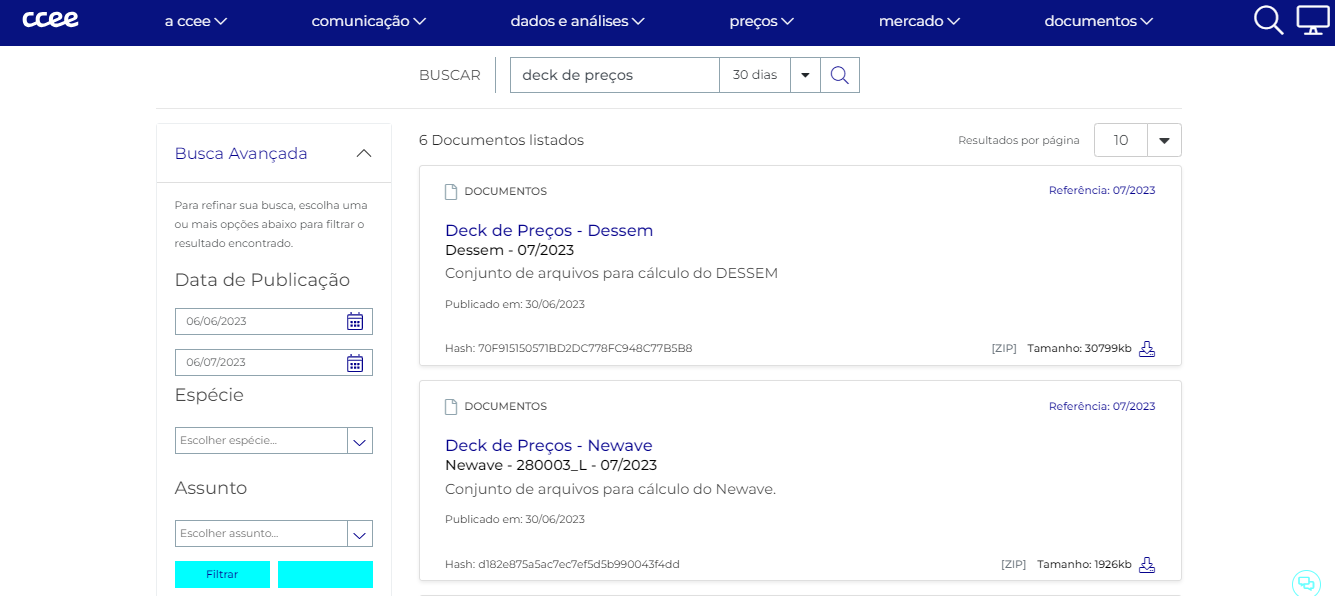

In [2]:
from google.colab import drive, files
import os

#Montar o Google Drive no Colab com o nome gdrive

drive.mount('/content/gdrive')

# O comando abaixo mostra qual diretório você está trabalhando momento.
print( os.getcwd() )

Caminho_do_Arquivo = 'gdrive/MyDrive/Planejamento_de_Sistemas_Eletricos_PPEE/Newave_Agosto2023'
# O comando mostra o que está presente dentro da minha pasta GIF no meu drive, que está dentro do meu drive e em Doutorado. Mudar para o diretório que vocês criaram.
print( os.listdir(Caminho_do_Arquivo) )

Mounted at /content/gdrive
/content
['VAZPAST.DAT', 'EXPH.DAT', 'CONFHD.DAT', 'MANUTT.DAT', 'DGER.DAT', 'MODIF.DAT', 'REE.DAT', 'ENSOAUX.DAT', 'C_ADIC.DAT', 'TERM.DAT', 'tecno.dat', 'CDEFVAR.DAT', 'EXPT.DAT', 'FORMAT.TMP', 'ITAIPU.DAT', 'CASO.DAT', 'POSTOS.DAT', 'CLAST.DAT', 'CVAR.DAT', 'CURVA.DAT', 'CONFT.DAT', 'LOSS.DAT', 'GHMIN.DAT', 'PENALID.DAT', 'selcor.dat', 'VAZOES.DAT', 'DSVAGUA.DAT', 'NewaveMsgPortug.txt', 'GTMINPAT.DAT', 'ARQUIVOS.DAT', 'RE.DAT', 'BID.DAT', 'AGRINT.DAT', 'HIDR.DAT', 'ADTERM.DAT', 'MENSAG.TMP', 'ELNINO.DAT', 'SHIST.DAT', 'GTMIN_CCEE_082023.xlsx', 'PATAMAR.DAT', 'SISTEMA.DAT']


In [3]:
from PySDDP.Pen import Newave

PMOAGO2023 = Newave(Caminho_do_Arquivo)

OK! Leitura do CASO.DAT realizada com sucesso.
OK! Leitura do ARQUIVOS.DAT realizada com sucesso.
OK! Leitura do DGER.DAT realizada com sucesso.
OK! Leitura do HIDR.DAT realizada com sucesso.
OK! Leitura do VAZOES.DAT realizada com sucesso.
OK! Leitura do MODIF.DAT realizada com sucesso. ( 99 Usinas Hidraulicas Modificadas )
OK! Leitura do EXPH.DAT realizada com sucesso. ( 2 Usinas Hidraulicas Expandidas )
OK! Leitura do CONFHD.DAT realizada com sucesso.
OK! Leitura do REE.DAT realizada com sucesso. ( 12 Reservatórios Equivalentes de Energia Foram Lidos )
OK! Leitura do SISTEMA.DAT realizada com sucesso.


# Dados

In [54]:
import numpy as np

#-----> Dados

Usina = PMOAGO2023.confhd.get('Furnas')

total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de meses considerados (num_meses = num_phis)
# num_meses = 3

# # Número de phis considerados (num_meses = num_phis)
# num_phis = 3

# Problema de Otimização

**Função Objetivo (FOB):**

$Min \hspace{0.5cm} \varepsilon _{mes,1932}^{2} + \varepsilon _{mes,1933}^{2} + ... + \varepsilon _{mes,2021}^{2} $

sujeito a:

**Restrição de Iguadade:**

$ Z_{mes,ano} = \phi _{1} \cdot Z_{mes-1} + \phi _{2} \cdot Z_{mes-2} + ... + \phi _{11} \cdot Z_{mes-11} + \varepsilon _{mes,ano} $

**Restrições de Canalização:**

$ -\infty \le \phi \le \infty $

$ -\infty \le \varepsilon _{mes,ano} \le \infty $


## Exemplo de Problema de Otimização

**Função Objetivo (FOB):**

$Min \hspace{0.5cm} \varepsilon _{AGO,1932}^{2} + \varepsilon _{AGO,1933}^{2} + ... + \varepsilon _{AGO,2021}^{2} $

sujeito a:

**Restrição de Iguadade:**

$ Z_{AGO,1932} = \phi _{1} \cdot Z_{JUL,1932} + \phi _{2} \cdot Z_{JUN,1932} + \phi _{3} \cdot Z_{MAI,1932} + \varepsilon _{AGO,1932} $

$ Z_{AGO,1933} = \phi _{1} \cdot Z_{JUL,1933} + \phi _{2} \cdot Z_{JUN,1933} + \phi _{3} \cdot Z_{MAI,1933} + \varepsilon _{AGO,1933} $

.
.
.

$ Z_{AGO,2021} = \phi _{1} \cdot Z_{JUL,2021} + \phi _{2} \cdot Z_{JUN,2021} + \phi _{3} \cdot Z_{MAI,2021} + \varepsilon _{AGO,2021} $

> Bloco com recuo



**Restrições de Canalização:**

$ -\infty \le \phi \le \infty $

$ -\infty \le \varepsilon _{mes,ano} \le \infty $

## Cálculo da Regressão Linear

In [55]:
from cvxopt import matrix, solvers
import numpy as np

def calculo_regressao_linear(Usina, mes, num_phis, imprime):

  #-----> Função Objetivo

  # Parte linear

  q = matrix(np.zeros(num_anos + num_phis))

  # Parte quadrática

  P = 2*np.eye(num_anos + num_phis)

  for i in range(num_phis):
    P[i][i] = 1e-6


  P = matrix(P)

  #-----> Restrições de Igualdade

  # Função para o recorte das matrizes

  def recorte(mes, nome):
    num_mes = mes - 1

    if (nome == 'Aeq'):
      if num_mes - num_phis >= 0:
        recorte =  Usina['vazoes'][1:total_anos, num_mes-num_phis:num_mes]
        recorte = recorte[:, ::-1]                               # Para espelhar a matriz e ficar com os dados de trás para frente
        return recorte
      else:
        recorte_ano_atual    =  Usina['vazoes'][1:total_anos, 0:num_mes]
        recorte_ano_atual = recorte_ano_atual[:, ::-1]           # Para espelhar a matriz e ficar com os dados de trás para frente

        recorte_ano_anterior =  Usina['vazoes'][0:total_anos-1, (num_mes-num_phis):]
        recorte_ano_anterior = recorte_ano_anterior[:, ::-1]     # Para espelhar a matriz e ficar com os dados de trás para frente

        recorte = matrix(np.concatenate((recorte_ano_atual, recorte_ano_anterior), axis=1))
        return recorte

    if (nome == 'Beq'):
      recorte = Usina['vazoes'][1:total_anos, num_mes:num_mes+1]
      return recorte

  recorte_Aeq = recorte(mes, 'Aeq')
  matriz_id_1 = np.eye(num_anos)

  Aeq = matrix(np.concatenate((recorte_Aeq, matriz_id_1), axis=1))

  Beq = matrix(recorte(mes, 'Beq'))
  Beq = Beq*1.0


  #-----> Restrições de Canalização ( -inf < phi < inf  e  -inf < erro < inf)

  matriz_id_2 = np.eye(num_anos + num_phis)

  G = matrix(np.concatenate((-1*matriz_id_2, matriz_id_2), axis=0))

  h = list()
  for i in range(num_anos + num_phis):
    h.append(1e10)
    # h.append(np.inf)
  for i in range(num_anos + num_phis):
    h.append(1e10)
    # h.append(np.inf)
  h = matrix(h)

  # Imprime as informações das matrizes

  if imprime == True:
    print('P: ',P)
    print('q: ',q)
    print('G: ',G)
    print('h: ',h)
    print('Aeq: ',Aeq)
    print('Beq: ',Beq)
    print(' ')
    print('Type P: ',type(P))
    print('Type q: ',type(q))
    print('Type G: ',type(G))
    print('Type h: ',type(h))
    print('Type Aeq: ',type(Aeq))
    print('Type Beq: ',type(Beq))
    print(' ')
    print('Tamanho P: ',np.shape(P))
    print('Tamanho q: ',np.shape(q))
    print('Tamanho G: ',np.shape(G))
    print('Tamanho h: ',np.shape(h))
    print('Tamanho Aeq: ',np.shape(Aeq))
    print('Tamanho Beq: ',np.shape(Beq))

  # Resolve o Problema de Otimização Quadrática

  solvers.options['show_progress'] = False

  sol = solvers.qp(P, q, G, h, Aeq, Beq)

  resultados = sol['x']

  return resultados


## Função para previsão de vazões

In [56]:
def dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao):

  # mes_previsao = imes
  num_mes_previsao = mes_previsao - 1
  num_meses = num_phis

  phis = list()

  # Loop para os phis
  for i in range(num_phis):
    phis.append(resultado[i])

  # print('Phis: ', phis)

  erros = list()

  num_erros = total_anos - 1

  # Loop para os erros
  for i in range(num_erros):
    erros.append(resultado[num_phis + i])

  # print('Erros: ', erros)

  Z = 0.

  phis_ano_anterior = abs(mes_previsao - num_meses) + 1
  phis_ano_atual = num_phis - phis_ano_anterior

  if mes_previsao - num_meses >= 0:
    for i in range(num_phis):
      Z += phis[i]*Usina['vazoes'][ano_previsao-1931][num_mes_previsao-i-1]
    # Z += erros[ano_previsao-1932]
  else:
    for i in range(phis_ano_atual):
      Z += phis[i]*Usina['vazoes'][ano_previsao-1931][num_mes_previsao-i-1]
    for i in range(phis_ano_anterior):
      Z += phis[phis_ano_atual-i]*Usina['vazoes'][ano_previsao-1-1931][12-i-1]
    # Z += erros[ano_previsao-1932]



  Vazao = Usina['vazoes'][ano_previsao-1931][mes_previsao-1]

  return Z, Vazao

## Previsão de Vazões

### Furnas

#### 2021

In [111]:
Z_previsao = list()
Vazao_real = list()

# Dados

num_phis = 3
ano_previsao = 2021

Usina = PMOAGO2023.confhd.get('Furnas')

# total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de meses considerados (num_meses = num_phis)
# num_meses = 3

# # Número de phis considerados (num_meses = num_phis)
# num_phis = 3

# # Mês escolhido
# mes = 8


# Execução

for i in range(12):
  imes = i + 1

#         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
  resultado = calculo_regressao_linear(Usina, imes, num_phis, imprime=False)

# def     dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao)
  dados = dados_resultados(Usina, resultado, num_phis, ano_previsao, imes)

  Z_previsao.append(dados[0])

  Vazao_real.append(dados[1])

print(Z_previsao)
print(Vazao_real)

[1320.6787951572724, 1164.1347100771582, 899.8607834516474, 579.6167799964984, 348.9385141793186, 256.4128943389161, 223.06921950278513, 173.48997976637682, 215.33470712927607, 209.43247258925956, 678.5743649349927, 1255.8373419533839]
[1139, 986, 835, 392, 306, 306, 218, 194, 163, 630, 739, 909]


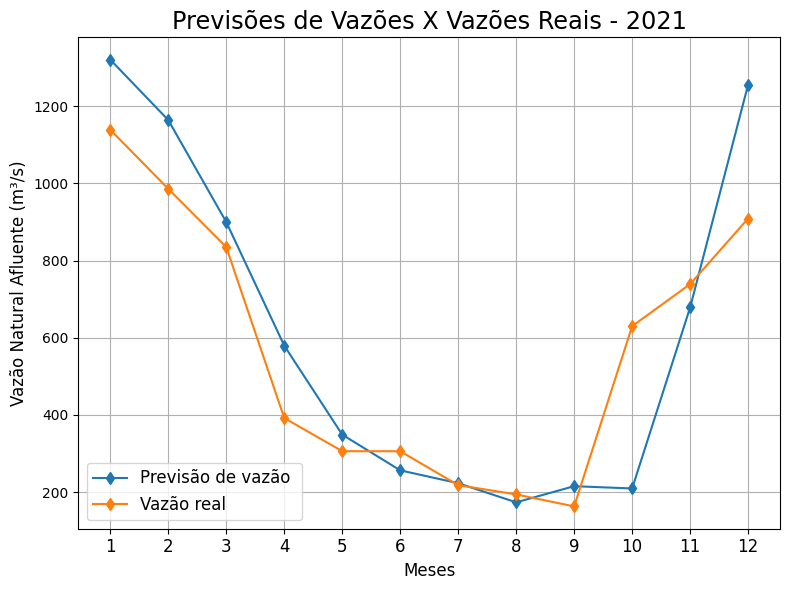

In [112]:
import numpy as np
import matplotlib.pyplot as plt

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize=(8,6))


plt.plot(meses, Z_previsao, marker='d', label="Previsão de vazão ")
plt.plot(meses, Vazao_real, marker='d', label="Vazão real")


plt.legend(fontsize="large")
plt.title('Previsões de Vazões X Vazões Reais - 2021',fontsize="xx-large")
plt.xlabel('Meses',fontsize="large")
plt.ylabel('Vazão Natural Afluente (m³/s)',fontsize="large")
plt.xticks(meses,fontsize="large")
plt.grid()
plt.tight_layout()
plt.show()

#### 2022

In [113]:
Z_previsao = list()
Vazao_real = list()

# Dados

num_phis = 3
ano_previsao = 2022

Usina = PMOAGO2023.confhd.get('Furnas')

# total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de meses considerados (num_meses = num_phis)
# num_meses = 3

# # Número de phis considerados (num_meses = num_phis)
# num_phis = 3

# # Mês escolhido
# mes = 8


# Execução

for i in range(12):
  imes = i + 1

#         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
  resultado = calculo_regressao_linear(Usina, imes, num_phis, imprime=False)

# def     dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao)
  dados = dados_resultados(Usina, resultado, num_phis, ano_previsao, imes)

  Z_previsao.append(dados[0])

  Vazao_real.append(dados[1])

print(Z_previsao)
print(Vazao_real)

[1202.1145003434565, 1981.948895399882, 1736.0593497346517, 858.6188864225071, 583.69462790426, 383.2396745403918, 305.60292505977174, 240.9242129428797, 273.34451820790207, 310.62680913651184, 566.4187170599834, 901.716775947971]
[2096, 2078, 843, 663, 444, 378, 295, 258, 289, 452, 496, 1269]


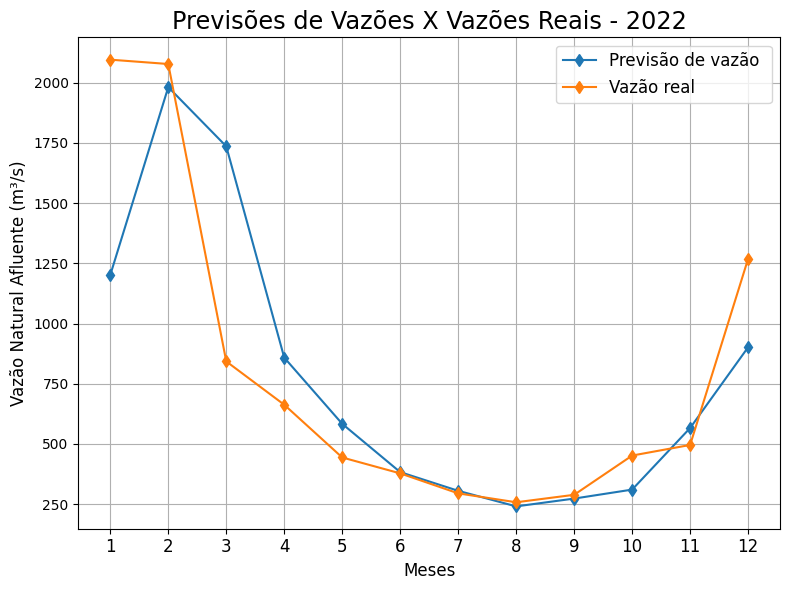

In [114]:
import numpy as np
import matplotlib.pyplot as plt

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize=(8,6))


plt.plot(meses, Z_previsao, marker='d', label="Previsão de vazão ")
plt.plot(meses, Vazao_real, marker='d', label="Vazão real")


plt.legend(fontsize="large")
plt.title('Previsões de Vazões X Vazões Reais - 2022',fontsize="xx-large")
plt.xlabel('Meses',fontsize="large")
plt.ylabel('Vazão Natural Afluente (m³/s)',fontsize="large")
plt.xticks(meses,fontsize="large")
plt.grid()
plt.tight_layout()
plt.show()

#### 2023

In [115]:
Z_previsao = list()
Vazao_real = list()

# Dados

num_phis = 3
ano_previsao = 2023

Usina = PMOAGO2023.confhd.get('Furnas')

# total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de meses considerados (num_meses = num_phis)
# num_meses = 3

# # Número de phis considerados (num_meses = num_phis)
# num_phis = 3

# # Mês escolhido
# mes = 8


# Execução

for i in range(12):
  imes = i + 1

#         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
  resultado = calculo_regressao_linear(Usina, imes, num_phis, imprime=False)

# def     dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao)
  dados = dados_resultados(Usina, resultado, num_phis, ano_previsao, imes)

  Z_previsao.append(dados[0])

  Vazao_real.append(dados[1])

print(Z_previsao)
print(Vazao_real)

[1641.989364562998, 2470.3965062608586, 1823.6825162677833, 1254.9458930729695, 862.8856636125589, 590.2963274531281, 478.1796849077899, 365.10591833362446, 411.9825731568649, 308.22528741929716, 173.16651359590458, 0.0]
[2997, 2334, 1585, 1131, 657, 624, 455, 341, 0, 0, 0, 0]


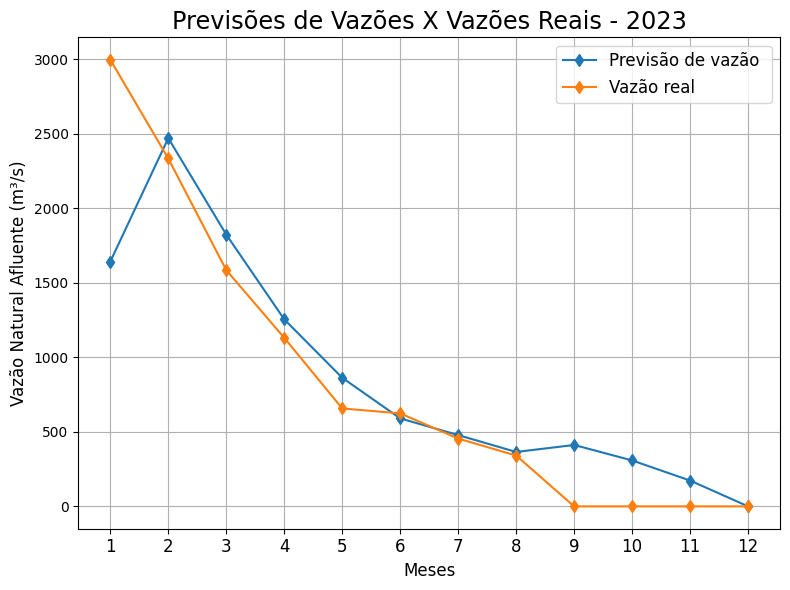

In [116]:
import numpy as np
import matplotlib.pyplot as plt

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize=(8,6))


plt.plot(meses, Z_previsao, marker='d', label="Previsão de vazão ")
plt.plot(meses, Vazao_real, marker='d', label="Vazão real")


plt.legend(fontsize="large")
plt.title('Previsões de Vazões X Vazões Reais - 2023',fontsize="xx-large")
plt.xlabel('Meses',fontsize="large")
plt.ylabel('Vazão Natural Afluente (m³/s)',fontsize="large")
plt.xticks(meses,fontsize="large")
plt.grid()
plt.tight_layout()
plt.show()

#### Histórico de Vazões

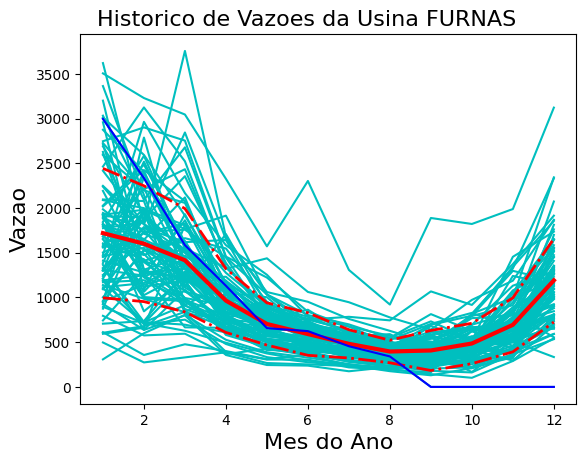

In [65]:
PMOAGO2023.confhd.plot_vaz(Usina)

#### Variando os phis - 2022

In [101]:
Z_previsao_3 = list()
Vazao_real_3 = list()

# Dados

num_phis = 3
ano_previsao = 2022

Usina = PMOAGO2023.confhd.get('Furnas')

# total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de meses considerados (num_meses = num_phis)
# num_meses = 3

# # Número de phis considerados (num_meses = num_phis)
# num_phis = 3

# # Mês escolhido
# mes = 8


# Execução

for i in range(12):
  imes = i + 1

#         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
  resultado = calculo_regressao_linear(Usina, imes, num_phis, imprime=False)

# def     dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao)
  dados = dados_resultados(Usina, resultado, num_phis, ano_previsao, imes)

  Z_previsao_3.append(dados[0])

  Vazao_real_3.append(dados[1])

print(Z_previsao_3)
print(Vazao_real_3)

[1202.1145003434565, 1981.948895399882, 1736.0593497346517, 858.6188864225071, 583.69462790426, 383.2396745403918, 305.60292505977174, 240.9242129428797, 273.34451820790207, 310.62680913651184, 566.4187170599834, 901.716775947971]
[2096, 2078, 843, 663, 444, 378, 295, 258, 289, 452, 496, 1269]


In [102]:
Z_previsao_6 = list()
Vazao_real_6 = list()

# Dados

num_phis = 6
ano_previsao = 2022

Usina = PMOAGO2023.confhd.get('Furnas')

# total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de meses considerados (num_meses = num_phis)
# num_meses = 3

# # Número de phis considerados (num_meses = num_phis)
# num_phis = 3

# # Mês escolhido
# mes = 8


# Execução

for i in range(12):
  imes = i + 1

#         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
  resultado = calculo_regressao_linear(Usina, imes, num_phis, imprime=False)

# def     dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao)
  dados = dados_resultados(Usina, resultado, num_phis, ano_previsao, imes)

  Z_previsao_6.append(dados[0])

  Vazao_real_6.append(dados[1])

print(Z_previsao_6)
print(Vazao_real_6)

[2337.985396288229, 2986.085639183634, 1852.9592765834523, 909.9417603519097, 627.2241641344815, 418.48314551347636, 321.84483632074927, 227.0187565869644, 273.514067414311, 310.60859266276464, 561.8036908834106, 852.4947272768267]
[2096, 2078, 843, 663, 444, 378, 295, 258, 289, 452, 496, 1269]


In [103]:
Z_previsao_9 = list()
Vazao_real_9 = list()

# Dados

num_phis = 9
ano_previsao = 2022

Usina = PMOAGO2023.confhd.get('Furnas')

# total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de meses considerados (num_meses = num_phis)
# num_meses = 3

# # Número de phis considerados (num_meses = num_phis)
# num_phis = 3

# # Mês escolhido
# mes = 8


# Execução

for i in range(12):
  imes = i + 1

#         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
  resultado = calculo_regressao_linear(Usina, imes, num_phis, imprime=False)

# def     dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao)
  dados = dados_resultados(Usina, resultado, num_phis, ano_previsao, imes)

  Z_previsao_9.append(dados[0])

  Vazao_real_9.append(dados[1])

print(Z_previsao_9)
print(Vazao_real_9)

[1421.9534515211851, 2047.2097394770708, 1531.370089466841, 1007.8828521151422, 727.4914539925577, 459.43383837528984, 310.93707869752524, 192.92654897097412, 178.4469770451837, 349.7886292579061, 645.4127667939432, 864.7437459424063]
[2096, 2078, 843, 663, 444, 378, 295, 258, 289, 452, 496, 1269]


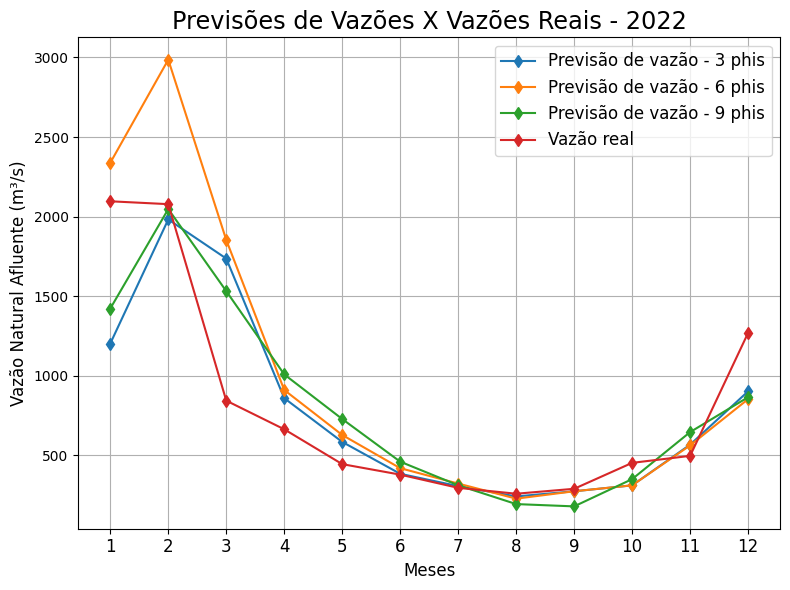

In [108]:
import numpy as np
import matplotlib.pyplot as plt

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize=(8,6))


plt.plot(meses, Z_previsao_3, marker='d', label="Previsão de vazão - 3 phis")
plt.plot(meses, Z_previsao_6, marker='d', label="Previsão de vazão - 6 phis")
plt.plot(meses, Z_previsao_9, marker='d', label="Previsão de vazão - 9 phis")
plt.plot(meses, Vazao_real_9, marker='d', label="Vazão real")


plt.legend(fontsize="large")
plt.title('Previsões de Vazões X Vazões Reais - 2022',fontsize="xx-large")
plt.xlabel('Meses',fontsize="large")
plt.ylabel('Vazão Natural Afluente (m³/s)',fontsize="large")
plt.xticks(meses,fontsize="large")
plt.grid()
plt.tight_layout()
plt.show()

#### Variando os phis - Fevereiro de 2022

In [109]:
Z_previsao = list()
Vazao_real = list()

# Dados

# num_phis = 3
ano_previsao = 2022

Usina = PMOAGO2023.confhd.get('Furnas')

# total_anos_dados = (np.shape(Usina['vazoes'])[0])

# Total de anos
total_anos = (np.shape(Usina['vazoes'])[0]) - 2

# Número de anos considerados (excluindo 1931 e os últimos dois anos - 2022 e 2023)
num_anos = total_anos - 1

# # Número de meses considerados (num_meses = num_phis)
# num_meses = 3

# # Número de phis considerados (num_meses = num_phis)
# num_phis = 3

# # Mês escolhido
mes = 2


# Execução


# #         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
# resultado = calculo_regressao_linear(Usina, mes, num_phis, imprime=False)

# # def     dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao)
# dados = dados_resultados(Usina, resultado, num_phis, ano_previsao, mes)

for i in range(11):
  inum_phis = i + 1

#         def calculo_regressao_linear(Usina, mes, num_phis, imprime)
  resultado = calculo_regressao_linear(Usina, mes, inum_phis, imprime=False)

# def     dados_resultados(Usina, resultado, num_phis, ano_previsao, mes_previsao)
  dados = dados_resultados(Usina, resultado, inum_phis, ano_previsao, mes)

  Z_previsao.append(dados[0])

  Vazao_real.append(dados[1])

print(Z_previsao)
print(Vazao_real)

[1780.7373966841499, 1749.4623564339504, 1981.948895399882, 2064.9660226812434, 1868.7814201077665, 2986.085639183634, 2077.5362641406755, 1399.257786315438, 2047.2097394770708, 1166.2610638287024, 1124.4954620540964]
[2078, 2078, 2078, 2078, 2078, 2078, 2078, 2078, 2078, 2078, 2078]


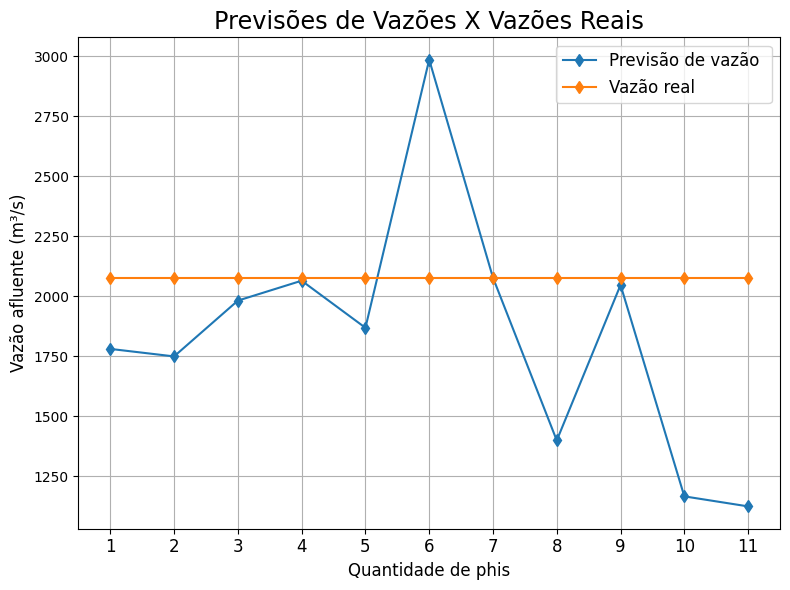

In [110]:
import numpy as np
import matplotlib.pyplot as plt

meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.figure(figsize=(8,6))


plt.plot(meses, Z_previsao, marker='d', label="Previsão de vazão ")
plt.plot(meses, Vazao_real, marker='d', label="Vazão real")


plt.legend(fontsize="large")
plt.title('Previsões de Vazões X Vazões Reais - Fev/2022',fontsize="xx-large")
plt.xlabel('Quantidade de phis',fontsize="large")
plt.ylabel('Vazão afluente (m³/s)',fontsize="large")
plt.xticks(meses,fontsize="large")
plt.grid()
plt.tight_layout()
plt.show()